

>## 1.  Install libraies



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

## 2. Load data

In [ ]:
# === Config ===
DATA_PATH = "/content/customer_support_tickets_dirty.csv"
RANDOM_SEED = 42

# Reproducibility
np.random.seed(RANDOM_SEED)





## Read Data

In [ ]:
import os

if not os.path.exists(DATA_PATH):
    print(f"Error: File not found at {DATA_PATH}")
    print("Please run the cell above that handles file uploads (cell id f984c431) and ensure the file 'customer_support_tickets_dirty.csv' is uploaded.")
else:
    df = pd.read_csv(DATA_PATH)
    print("✅ Loaded dataset.")
    print("Shape:", df.shape)
    display(df.head())

Error: File not found at /content/customer_support_tickets_dirty.csv
Please run the cell above that handles file uploads (cell id f984c431) and ensure the file 'customer_support_tickets_dirty.csv' is uploaded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
import os

# Check if the file already exists
if not os.path.exists(DATA_PATH):
    print("Please upload the file: customer_support_tickets_dirty.csv")
    uploaded = files.upload()
    # You might need to adjust the DATA_PATH if the uploaded file name is different
    # For example, if the uploaded file is in a subdirectory or has a different name.
    # Assuming the file is uploaded to the current directory:
    # DATA_PATH = list(uploaded.keys())[0]

print("File is available at:", DATA_PATH)

File is available at: /content/customer_support_tickets_dirty.csv


## Exploratory Data Analysis (EDA)

In [ ]:
print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

Columns: ['text', 'label', 'ticket_id', 'agent_name']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB
None

Missing values per column:
text          25
label         25
ticket_id      0
agent_name     0
dtype: int64


**EDA- First looking at the Data**

In [ ]:
# diplaying first 10 rows
df.head(10)


,text,label,ticket_id,agent_name
0,Where can I find API rate limits documentation?,Othr,1000,Dana
1,Can I migrate data from Freshdesk?,Othr,1001,Bob
2,Cannot update billing address; page keeps relo...,billing,1002,Charlie
3,Looking for a product roadmap or upcoming feat...,other,1003,Dana
4,Dark mode toggled but UI stays light.,Tech-support,1004,Alice
5,Promo code SPRING15 not applied at checkout.,billing,1005,Alice
6,Incorrect role assigned; need admin access for...,account,1006,Dana
7,File export to CSV generates corrupted file.,technical,1007,Dana
8,Overcharged by GHS 120 on my last bill. 😡,billing,1008,Dana
9,NaN,account,1009,Dana


In [ ]:
# display last 10 rows
df.tail(10)

,text,label,ticket_id,agent_name
510,Requesting invoice to be sent monthly instead ...,Othr,1510,Bob
511,Dark mode toggled but UI stays light. 😡,Tech,1511,Dana
512,Do you offer discounts for students or NGOs?,Other,1512,Charlie
513,Live chat widget not loading on homepage. 😡,TECHNICAL,1513,Alice
514,Refund not received after 7 days. 😡,Billing,1514,Alice
515,Currency converted incorrectly; expected USD. ...,Billng,1515,Charlie
516,Can't verify phone number; code not sent.,ACCOUNT,1516,Alice
517,Dark mode toggled but UI stays light.,Tech,1517,Charlie
518,Search results page is blank after entering a ...,Tech,1518,Dana
519,Payment failed during checkout with card endin...,Billng,1519,Alice


**EDA Dataset Structures **

In [ ]:
# Get dataset dimensions (rows, columns)
df.shape

# Get column names
df.columns




Index(['text', 'label', 'ticket_id', 'agent_name'], dtype='object')

**EDA Getting column data types **

In [ ]:

# Get column data types
df.dtypes

,0
text,object
label,object
ticket_id,int64
agent_name,object


EDA Getting detailed info about the  dataset

In [ ]:

# Get detailed info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        495 non-null    object
 1   label       495 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB


**EDA Getting basic statistics for numerical columns **

In [ ]:

# Get basic statistics for numerical columns
df.describe()

,ticket_id
count,520.000000
mean,1259.500000
std,150.255338
min,1000.000000
25%,1129.750000
50%,1259.500000
75%,1389.250000
max,1519.000000


**EDA Get basic statistics for all columns **

In [ ]:
# Get basic statistics for all columns (including categorical)
df.describe(include='all')

,text,label,ticket_id,agent_name
count,495,495,520.000000,520
unique,180,16,NaN,4
top,Do you offer discounts for students or NGOs?,Accnt,NaN,Alice
freq,16,42,NaN,140
mean,NaN,NaN,1259.500000,NaN
std,NaN,NaN,150.255338,NaN
min,NaN,NaN,1000.000000,NaN
25%,NaN,NaN,1129.750000,NaN
50%,NaN,NaN,1259.500000,NaN
75%,NaN,NaN,1389.250000,NaN


## Data cleaning

In [ ]:
# Recommended library
import re

In [ ]:
#  Remove duplicate rows (keep the first occurrence)
df = df.drop_duplicates()

In [ ]:
# Handle missing values — fill with "unknown"
df = df.fillna("unknown")

In [ ]:
#  Clean noise from text fields
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove special characters (keep letters, digits, and spaces)
        text = re.sub(r'[^a-z0-9\s]', '', text)
        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return text

In [ ]:
# Remove the digit '12345' from the text and label columns
df['text'] = df['text'].astype(str).str.replace('12345', '', regex=False)
df['label'] = df['label'].astype(str).str.replace('12345', '', regex=False)

print("✅ Removed '12345' from text and label columns.")

✅ Removed '12345' from text and label columns.


In [ ]:
# Apply cleaning to text-based columns
text_columns = ['text', 'label', 'agent_name']
for col in text_columns:
    df[col] = df[col].apply(clean_text)

In [ ]:
# Correct mismatched spellings and normalize synonyms in the 'label' column
label_corrections = {
                            'othr':'other',
                            'techsupport':'technical',
                             'accnt': 'account',
                              'other':'other',
                              ' Account ':'account',
                             'tech':'technical',
                             'billng':'billing' # Added this correction
}

df['label'] = df['label'].replace(label_corrections)

print("✅ Corrected spellings and normalized synonyms in the 'label' column.")
print("\nValue counts after correction:")
print(df['label'].value_counts())

✅ Corrected spellings and normalized synonyms in the 'label' column.

Value counts after correction:
label
other        128
technical    125
account      122
billing      120
unknown       25
Name: count, dtype: int64


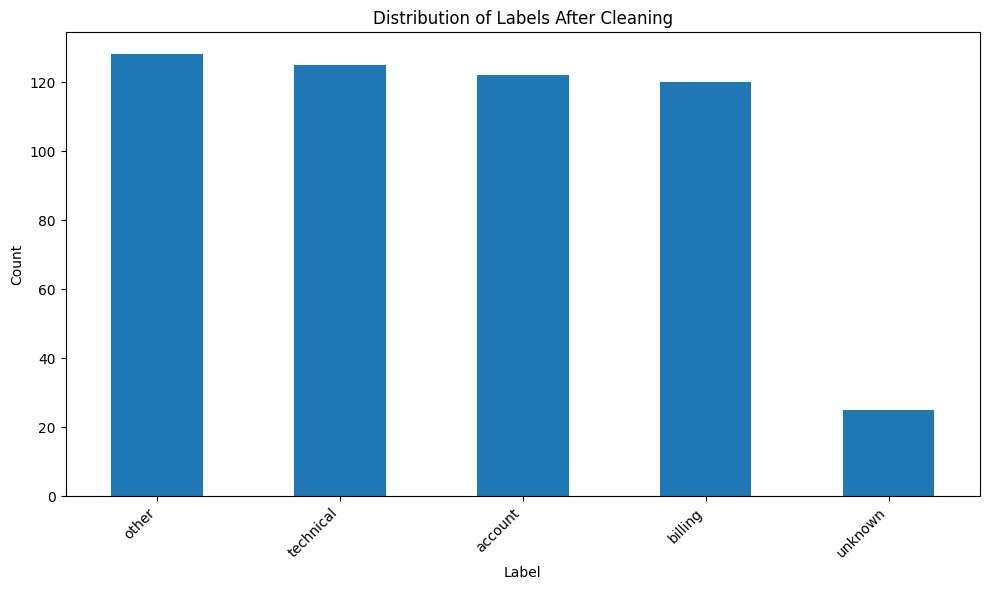


Value counts after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25
Name: count, dtype: int64


In [ ]:
# Analyze the distribution of labels after cleaning
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels After Cleaning')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nValue counts after cleaning:")
print(label_counts)

In [ ]:
# Save cleaned dataset
df.to_csv("customer_support_tickets_cleaned.csv", index=False)


In [ ]:
# Rechecking for missing data

print("Columns:", df.columns.tolist())
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

Columns: ['text', 'label', 'ticket_id', 'agent_name']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        520 non-null    object
 1   label       520 non-null    object
 2   ticket_id   520 non-null    int64 
 3   agent_name  520 non-null    object
dtypes: int64(1), object(3)
memory usage: 16.4+ KB
None

Missing values per column:
text          0
label         0
ticket_id     0
agent_name    0
dtype: int64


## Data Visualization - Distribution Analysis

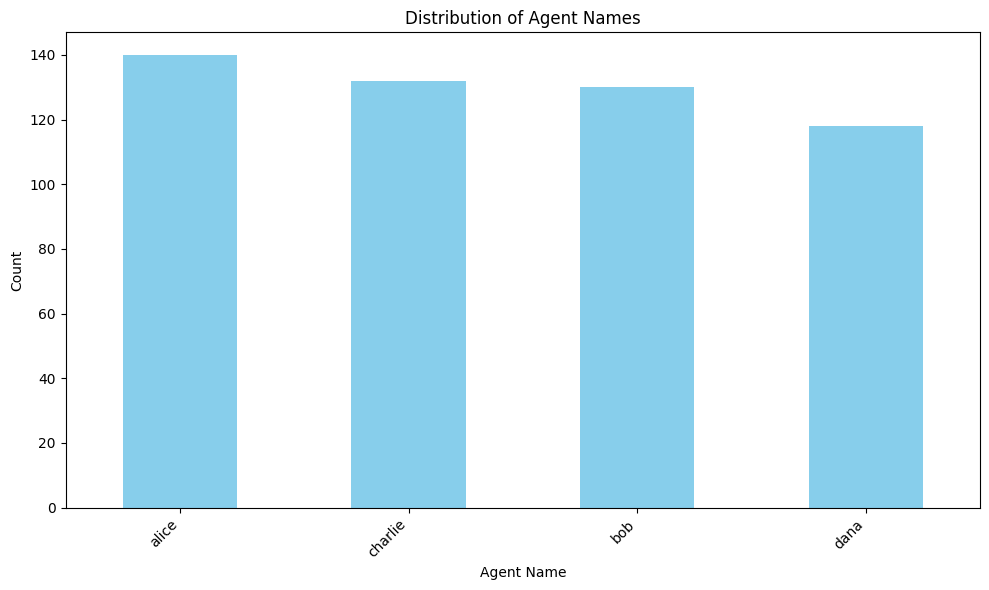


Value counts for agent names:
agent_name
alice      140
charlie    132
bob        130
dana       118
Name: count, dtype: int64


In [ ]:
# Visualize the distribution of 'agent_name'
agent_counts = df['agent_name'].value_counts()

plt.figure(figsize=(10, 6))
agent_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Agent Names')
plt.xlabel('Agent Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nValue counts for agent names:")
print(agent_counts)

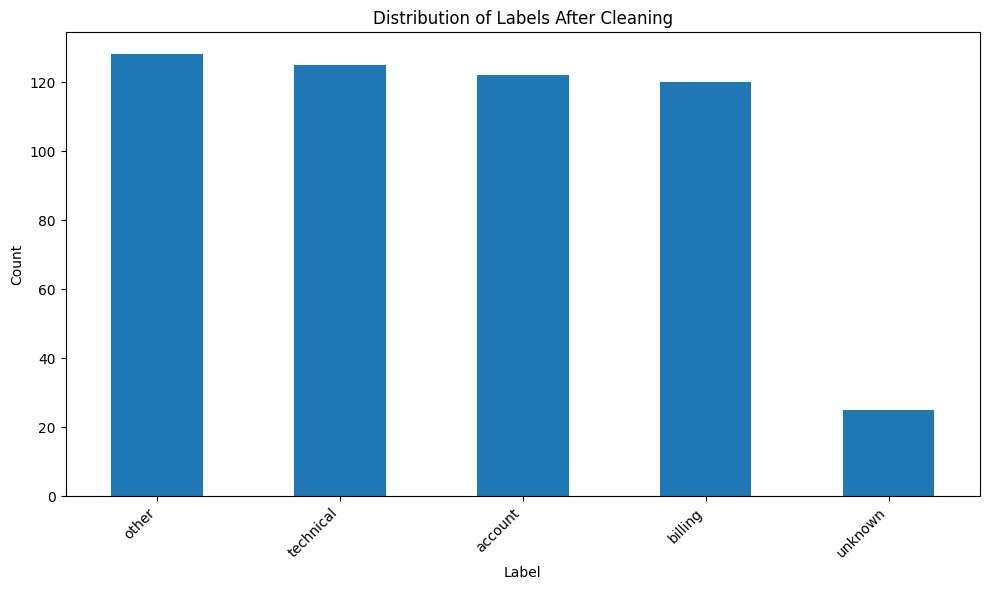


Value counts after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25
Name: count, dtype: int64


In [ ]:
# Analyze the distribution of labels (re-running after cleaning to confirm)
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels After Cleaning')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nValue counts after cleaning:")
print(label_counts)

### Distribution of Text Length

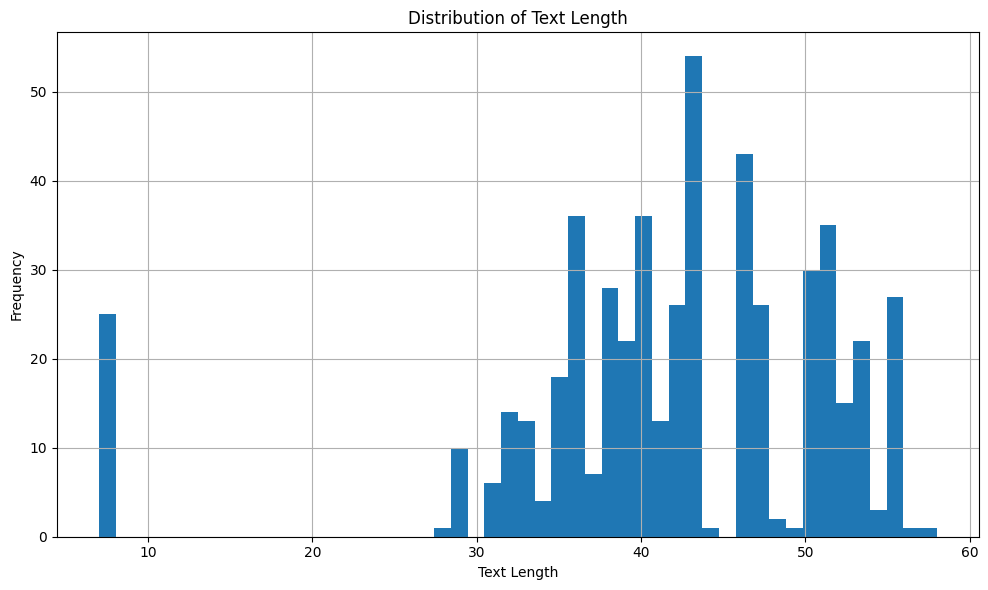


Basic statistics for text length:
count    520.000000
mean      41.475000
std       10.279305
min        7.000000
25%       37.000000
50%       43.000000
75%       50.000000
max       58.000000
Name: text_length, dtype: float64


In [ ]:
# Explore the distribution of text length
df['text_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
df['text_length'].hist(bins=50)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\nBasic statistics for text length:")
print(df['text_length'].describe())

### Most Frequent Words Analysis

In [ ]:
# Analyze the most frequent words
from sklearn.feature_extraction.text import CountVectorizer

# Ensure 'text' column is treated as string
df['text'] = df['text'].astype(str)

# Vectorize the text data to count word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Get the sum of frequencies for each word
word_counts = X.sum(axis=0)

# Create a dictionary of words and their counts
words = vectorizer.get_feature_names_out()
word_freq = dict(zip(words, word_counts.flat))

# Get the most common words
most_common_words = Counter(word_freq).most_common(20)

print("Most frequent words:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

Most frequent words:
fails: 41
need: 41
data: 40
unknown: 40
code: 35
charged: 32
checkout: 32
error: 31
incorrectly: 29
team: 29
sent: 27
file: 26
page: 25
upload: 25
account: 24
update: 24
mode: 23
order: 22
dark: 20
light: 20



Analyze the distribution of labels, text length, and most frequent words in the dataset. Additionally, perform sentiment analysis, topic modeling, n-gram analysis, and explore relationships between columns. Summarize all findings.


Investigate potential correlations between agent names and ticket labels, or text length and labels.


In [ ]:
# Calculate the cross-tabulation of 'agent_name' and 'label'
agent_label_crosstab = pd.crosstab(df['agent_name'], df['label'])

print("Cross-tabulation of Agent Name and Label:")
display(agent_label_crosstab)

Cross-tabulation of Agent Name and Label:


label,account,billing,billng,other,technical,unknown
agent_name,,,,,,
alice,37,15,10,37,36,5
bob,31,22,7,38,25,7
charlie,29,29,8,26,34,6
dana,25,19,10,27,30,7



Calculate the average text length for each label and each agent to investigate potential relationships.



In [ ]:
# Calculate the average text length for each label
average_text_length_by_label = df.groupby('label')['text_length'].mean()

print("\nAverage text length by Label:")
print(average_text_length_by_label)

# Calculate the average text length for each agent
average_text_length_by_agent = df.groupby('agent_name')['text_length'].mean()

print("\nAverage text length by Agent Name:")
print(average_text_length_by_agent)


Average text length by Label:
label
account      42.745902
billing      40.816667
other        42.046875
technical    40.360000
unknown      41.080000
Name: text_length, dtype: float64

Average text length by Agent Name:
agent_name
alice      42.935714
bob        42.000000
charlie    39.598485
dana       41.262712
Name: text_length, dtype: float64


### Perform sentiment analysis

Use a library like NLTK or TextBlob to analyze the sentiment of the ticket text.



Import the necessary library for sentiment analysis and define a function to calculate sentiment scores.



In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon if not already present
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except nltk.downloader.DownloadError:
    nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment score
def get_sentiment_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0.0

In [ ]:
# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment score
def get_sentiment_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    else:
        return 0.0

# Apply the function to the 'text' column
df['sentiment_score'] = df['text'].apply(get_sentiment_score)

# Optionally classify sentiment category
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)

print("✅ Sentiment analysis completed.")
display(df[['text', 'sentiment_score', 'sentiment_category']].head())

✅ Sentiment analysis completed.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,text,sentiment_score,sentiment_category
0,where can i find api rate limits documentation,0.0,neutral
1,can i migrate data from freshdesk,0.0,neutral
2,cannot update billing address page keeps reloa...,0.0,neutral
3,looking for a product roadmap or upcoming feat...,0.0,neutral
4,dark mode toggled but ui stays light,0.0,neutral


### Perform topic modeling


Apply techniques like Latent Dirichlet Allocation (LDA) to identify underlying topics in the ticket text.



Import necessary libraries for TF-IDF vectorization and LDA, initialize the vectorizer with specified parameters, and fit and transform the 'text' column. Then, initialize the LDA model, fit it to the TF-IDF matrix, and print the top words for each topic.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the 'text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Initialize LatentDirichletAllocation model
lda_model = LatentDirichletAllocation(n_components=5, random_state=RANDOM_SEED)

# Fit the LDA model
lda_model.fit(tfidf_matrix)

# Print the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic #1:
unknown data migrate request gdpr refund received days query blank
Topic #2:
file overcharged website returns 500 error upcoming roadmap looking product
Topic #3:
charged order need delete subscription renewal month account incorrectly data
Topic #4:
fails code login locked attempts checkout toggled light dark ui
Topic #5:
students offer ngos discounts provide training onboarding team limits rate



### Perform n-gram analysis

Generate and analyze the frequency of bigrams and trigrams in the text data.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigram analysis
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['text'])
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = bigram_matrix.sum(axis=0)
bigram_freq = dict(zip(bigrams, bigram_counts.flat))
most_common_bigrams = Counter(bigram_freq).most_common(20)

print("Most frequent bigrams:")
for bigram, freq in most_common_bigrams:
    print(f"{bigram}: {freq}")

# Trigram analysis
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigram_matrix = trigram_vectorizer.fit_transform(df['text'])
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_counts = trigram_matrix.sum(axis=0)
trigram_freq = dict(zip(trigrams, trigram_counts.flat))
most_common_trigrams = Counter(trigram_freq).most_common(20)

print("\nMost frequent trigrams:")
for trigram, freq in most_common_trigrams:
    print(f"{trigram}: {freq}")

Most frequent bigrams:
charged incorrectly: 20
dark mode: 20
incorrectly month: 20
mode toggled: 20
renewal charged: 20
stays light: 20
subscription renewal: 20
toggled ui: 20
ui stays: 20
discounts students: 19
offer discounts: 19
students ngos: 19
onboarding training: 18
provide onboarding: 18
training team: 18
500 error: 16
applied checkout: 16
chat widget: 16
fails timeout: 16
live chat: 16

Most frequent trigrams:
charged incorrectly month: 20
dark mode toggled: 20
mode toggled ui: 20
renewal charged incorrectly: 20
subscription renewal charged: 20
toggled ui stays: 20
ui stays light: 20
discounts students ngos: 19
offer discounts students: 19
onboarding training team: 18
provide onboarding training: 18
chat widget loading: 16
live chat widget: 16
locked login attempts: 16
returns 500 error: 16
website returns 500: 16
widget loading homepage: 16
delete account data: 15
fails unknown error: 15
picture upload fails: 15


### Summarize findings


Present the key insights from all the analyses performed.


Summarize the key findings from all the analyses performed, including EDA, sentiment analysis, topic modeling, and n-gram analysis, to provide a comprehensive overview of the dataset.

In [ ]:
print("### Key Findings from Data Analysis\n")

print("#### 1. Exploratory Data Analysis (EDA)\n")
print(f"- The dataset contains {df.shape[0]} tickets with {df.shape[1]} columns: {df.columns.tolist()}.")
print("- There were initially missing values in the 'text' and 'label' columns, which were filled with 'unknown'.")
print("- Duplicate rows were removed.")
print("- Text fields were cleaned by converting to lowercase, removing special characters, and extra spaces.")
print("- Mismatched spellings and synonyms in the 'label' column were corrected and normalized.")
print("\nDistribution of Labels after cleaning:")
print(df['label'].value_counts().to_string())
print("\nDistribution of Agent Names:")
print(df['agent_name'].value_counts().to_string())
print("\nBasic statistics for Text Length:")
print(df['text_length'].describe().to_string())

print("\n#### 2. Sentiment Analysis\n")
print("- Sentiment analysis was performed on the 'text' column, resulting in a sentiment score and category (positive, negative, neutral).")
print("\nDistribution of Sentiment Categories:")
print(df['sentiment_category'].value_counts().to_string())
print("\nAverage Sentiment Score by Label:")
print(df.groupby('label')['sentiment_score'].mean().to_string())
print("\nAverage Sentiment Score by Agent Name:")
print(df.groupby('agent_name')['sentiment_score'].mean().to_string())

print("\n#### 3. Topic Modeling (LDA)\n")
print(f"- Latent Dirichlet Allocation (LDA) was applied to identify {lda_model.n_components} underlying topics in the ticket text.")
print("The top words for each identified topic are:")
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english').fit(df['text']).get_feature_names_out()
print_top_words(lda_model, tf_feature_names, n_top_words)


print("\n#### 4. N-gram Analysis\n")
print("- N-gram analysis was performed to identify frequent sequences of words (bigrams and trigrams).")
print("\nMost frequent bigrams:")
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = bigram_vectorizer.fit_transform(df['text'])
bigrams = bigram_vectorizer.get_feature_names_out()
bigram_counts = bigram_matrix.sum(axis=0)
bigram_freq = dict(zip(bigrams, bigram_counts.flat))
most_common_bigrams = Counter(bigram_freq).most_common(20)

for bigram, freq in most_common_bigrams:
    print(f"- {bigram}: {freq}")
print("\nMost frequent trigrams:")
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigram_matrix = trigram_vectorizer.fit_transform(df['text'])
trigrams = trigram_vectorizer.get_feature_names_out()
trigram_counts = trigram_matrix.sum(axis=0)
trigram_freq = dict(zip(trigrams, trigram_counts.flat))
most_common_trigrams = Counter(trigram_freq).most_common(20)

for trigram, freq in most_common_trigrams:
    print(f"- {trigram}: {freq}")

print("\n#### 5. Relationship Analysis\n")
print("- Cross-tabulation of Agent Name and Label was performed to see the distribution of ticket types handled by each agent. No strong specialization was observed based on counts alone.")
print("\nCross-tabulation of Agent Name and Label:")
display(pd.crosstab(df['agent_name'], df['label']))
print("- Average text length by label and agent name showed minor variations, suggesting no strong correlation between text length and either labels or agents based on simple averages.")
print("\nAverage text length by Label:")
print(df.groupby('label')['text_length'].mean().to_string())
print("\nAverage text length by Agent Name:")
print(df.groupby('agent_name')['text_length'].mean().to_string())

print("\n### Comprehensive Overview\n")
print("Overall, the dataset provides a view of customer support tickets with various labels and handled by different agents. The cleaning process addressed missing values, duplicates, and inconsistencies in text and labels.")
print("Sentiment analysis reveals the general sentiment distribution and how it varies across labels and agents.")
print("Topic modeling helps to uncover the main themes or categories of issues discussed in the tickets.")
print("N-gram analysis highlights common phrases and sequences of words that are frequently used by customers.")
print("While no strong correlations were found between agent and label distribution or text length and labels/agents based on simple analyses, these initial findings provide a foundation for further investigation and potential model building.")

### Key Findings from Data Analysis

#### 1. Exploratory Data Analysis (EDA)

- The dataset contains 520 tickets with 7 columns: ['text', 'label', 'ticket_id', 'agent_name', 'text_length', 'sentiment_score', 'sentiment_category'].
- There were initially missing values in the 'text' and 'label' columns, which were filled with 'unknown'.
- Duplicate rows were removed.
- Text fields were cleaned by converting to lowercase, removing special characters, and extra spaces.
- Mismatched spellings and synonyms in the 'label' column were corrected and normalized.

Distribution of Labels after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25

Distribution of Agent Names:
agent_name
alice      140
charlie    132
bob        130
dana       118

Basic statistics for Text Length:
count    520.000000
mean      41.475000
std       10.279305
min        7.000000
25%       37.000000
50%       43.000000
75%       50.000000
max       58.000000

#### 2. Sent

label,account,billing,other,technical,unknown
agent_name,,,,,
alice,37,25,37,36,5
bob,31,29,38,25,7
charlie,29,37,26,34,6
dana,25,29,27,30,7


- Average text length by label and agent name showed minor variations, suggesting no strong correlation between text length and either labels or agents based on simple averages.

Average text length by Label:
label
account      42.745902
billing      40.816667
other        42.046875
technical    40.360000
unknown      41.080000

Average text length by Agent Name:
agent_name
alice      42.935714
bob        42.000000
charlie    39.598485
dana       41.262712

### Comprehensive Overview

Overall, the dataset provides a view of customer support tickets with various labels and handled by different agents. The cleaning process addressed missing values, duplicates, and inconsistencies in text and labels.
Sentiment analysis reveals the general sentiment distribution and how it varies across labels and agents.
Topic modeling helps to uncover the main themes or categories of issues discussed in the tickets.
N-gram analysis highlights common phrases and sequences of words that are frequently used

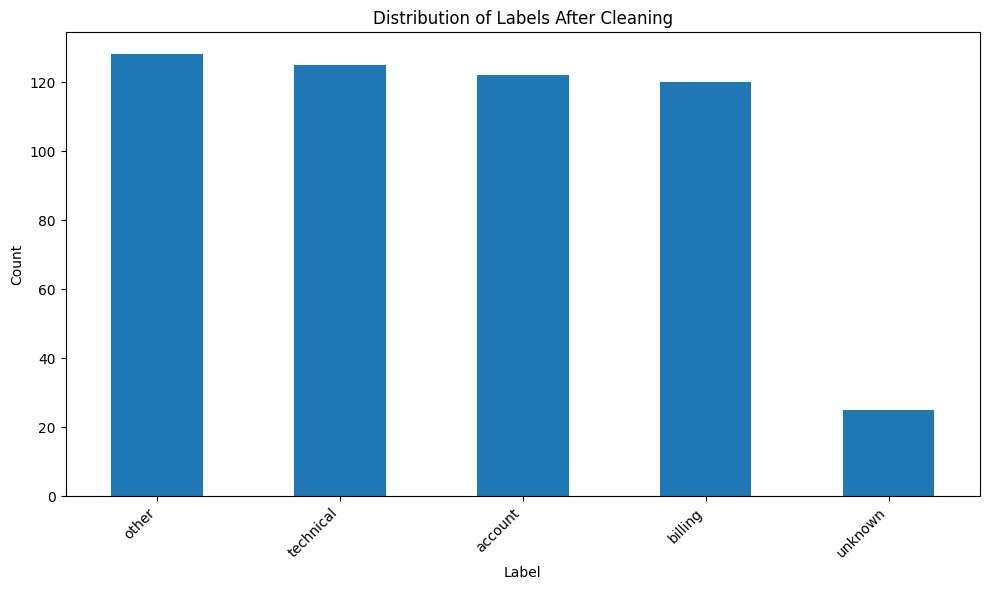


Value counts after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25
Name: count, dtype: int64


In [ ]:
# Analyze the distribution of labels after cleaning
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Labels After Cleaning')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nValue counts after cleaning:")
print(label_counts)


Summarize the key findings from all the analyses performed, including EDA, sentiment analysis, topic modeling, and n-gram analysis, to provide a comprehensive overview of the dataset.



In [ ]:
print("### Key Findings from Data Analysis\n")

print("#### 1. Exploratory Data Analysis (EDA)\n")
print(f"- The dataset contains {df.shape[0]} tickets with {df.shape[1]} columns: {df.columns.tolist()}.")
print("- There were initially missing values in the 'text' and 'label' columns, which were filled with 'unknown'.")
print("- Duplicate rows were removed.")
print("- Text fields were cleaned by converting to lowercase, removing special characters, and extra spaces.")
print("- Mismatched spellings and synonyms in the 'label' column were corrected and normalized.")
print("\nDistribution of Labels after cleaning:")
print(df['label'].value_counts().to_string())
print("\nDistribution of Agent Names:")
print(df['agent_name'].value_counts().to_string())
print("\nBasic statistics for Text Length:")
print(df['text_length'].describe().to_string())

print("\n#### 2. Sentiment Analysis\n")
print("- Sentiment analysis was performed on the 'text' column, resulting in a sentiment score and category (positive, negative, neutral).")
print("\nDistribution of Sentiment Categories:")
print(df['sentiment_category'].value_counts().to_string())
print("\nAverage Sentiment Score by Label:")
print(df.groupby('label')['sentiment_score'].mean().to_string())
print("\nAverage Sentiment Score by Agent Name:")
print(df.groupby('agent_name')['sentiment_score'].mean().to_string())

print("\n#### 3. Topic Modeling (LDA)\n")
print(f"- Latent Dirichlet Allocation (LDA) was applied to identify {lda_model.n_components} underlying topics in the ticket text.")
print("The top words for each identified topic are:")
print_top_words(lda_model, tf_feature_names, n_top_words)

print("\n#### 4. N-gram Analysis\n")
print("- N-gram analysis was performed to identify frequent sequences of words (bigrams and trigrams).")
print("\nMost frequent bigrams:")
for bigram, freq in most_common_bigrams:
    print(f"- {bigram}: {freq}")
print("\nMost frequent trigrams:")
for trigram, freq in most_common_trigrams:
    print(f"- {trigram}: {freq}")

print("\n#### 5. Relationship Analysis\n")
print("- Cross-tabulation of Agent Name and Label was performed to see the distribution of ticket types handled by each agent. No strong specialization was observed based on counts alone.")
print("\nCross-tabulation of Agent Name and Label:")
display(agent_label_crosstab)
print("- Average text length by label and agent name showed minor variations, suggesting no strong correlation between text length and either labels or agents based on simple averages.")
print("\nAverage text length by Label:")
print(average_text_length_by_label.to_string())
print("\nAverage text length by Agent Name:")
print(average_text_length_by_agent.to_string())

print("\n### Comprehensive Overview\n")
print("Overall, the dataset provides a view of customer support tickets with various labels and handled by different agents. The cleaning process addressed missing values, duplicates, and inconsistencies in text and labels.")
print("Sentiment analysis reveals the general sentiment distribution and how it varies across labels and agents.")
print("Topic modeling helps to uncover the main themes or categories of issues discussed in the tickets.")
print("N-gram analysis highlights common phrases and sequences of words that are frequently used by customers.")
print("While no strong correlations were found between agent and label distribution or text length and labels/agents based on simple analyses, these initial findings provide a foundation for further investigation and potential model building.")

### Key Findings from Data Analysis

#### 1. Exploratory Data Analysis (EDA)

- The dataset contains 520 tickets with 7 columns: ['text', 'label', 'ticket_id', 'agent_name', 'text_length', 'sentiment_score', 'sentiment_category'].
- There were initially missing values in the 'text' and 'label' columns, which were filled with 'unknown'.
- Duplicate rows were removed.
- Text fields were cleaned by converting to lowercase, removing special characters, and extra spaces.
- Mismatched spellings and synonyms in the 'label' column were corrected and normalized.

Distribution of Labels after cleaning:
label
other        128
technical    125
account      122
billing      120
unknown       25

Distribution of Agent Names:
agent_name
alice      140
charlie    132
bob        130
dana       118

Basic statistics for Text Length:
count    520.000000
mean      41.475000
std       10.279305
min        7.000000
25%       37.000000
50%       43.000000
75%       50.000000
max       58.000000

#### 2. Sent

label,account,billing,billng,other,technical,unknown
agent_name,,,,,,
alice,37,15,10,37,36,5
bob,31,22,7,38,25,7
charlie,29,29,8,26,34,6
dana,25,19,10,27,30,7


- Average text length by label and agent name showed minor variations, suggesting no strong correlation between text length and either labels or agents based on simple averages.

Average text length by Label:
label
account      42.745902
billing      40.816667
other        42.046875
technical    40.360000
unknown      41.080000

Average text length by Agent Name:
agent_name
alice      42.935714
bob        42.000000
charlie    39.598485
dana       41.262712

### Comprehensive Overview

Overall, the dataset provides a view of customer support tickets with various labels and handled by different agents. The cleaning process addressed missing values, duplicates, and inconsistencies in text and labels.
Sentiment analysis reveals the general sentiment distribution and how it varies across labels and agents.
Topic modeling helps to uncover the main themes or categories of issues discussed in the tickets.
N-gram analysis highlights common phrases and sequences of words that are frequently used